In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initial imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the crypto_data.csv dataset.
file_path = "Resources/healthXjob_final_2.csv"
job_health_df = pd.read_csv(file_path, index_col=0, encoding="ISO-8859-1")
print(job_health_df.shape)
job_health_df.head(10)

(400, 32)


,Year,Province,Sex,Age_group,Arthritis,Asthma,Obese,Overweight,Pulmonary_disease,Current_smoker_daily,...,J_L_R_Dissatisfied,J_L_R_Going_to_school,J_L_R_not_worked_last_year,J_L_R_Never_worked,J_L_R_Other_reasons,J_L_R_Own_illness_disability,J_L_R_Permanent_layoff,J_L_R_Personal_family_reasons,J_L_R_Retired,J_L_R_Temporary_layoff
0,2017,Alberta,Females,1,14300.0,50600.0,82500.0,112700.0,NaN,43900.0,...,5000.0,37700.0,24600.0,103400.0,1700.0,NaN,23500.0,1500.0,NaN,NaN
1,2017,Alberta,Females,2,44600.0,39500.0,133000.0,112300.0,7900.0,50900.0,...,10500.0,7300.0,242200.0,66600.0,11200.0,7500.0,58600.0,23100.0,NaN,NaN
2,2017,Alberta,Females,3,127600.0,24800.0,112400.0,112000.0,16100.0,42000.0,...,3300.0,NaN,153900.0,14100.0,NaN,4600.0,17400.0,NaN,7600.0,NaN
3,2017,Alberta,Females,4,147900.0,17900.0,66800.0,91600.0,20200.0,22700.0,...,NaN,NaN,392700.0,49000.0,NaN,NaN,6500.0,NaN,10000.0,NaN
4,2017,Alberta,Males,1,11700.0,51800.0,124000.0,172400.0,NaN,69400.0,...,9000.0,41600.0,30600.0,105000.0,NaN,NaN,31000.0,NaN,NaN,NaN
5,2017,Alberta,Males,2,58700.0,29100.0,170900.0,187200.0,NaN,75000.0,...,7200.0,7700.0,94200.0,22600.0,6700.0,7200.0,72900.0,NaN,NaN,3200.0
6,2017,Alberta,Males,3,104300.0,24000.0,144200.0,176800.0,18100.0,79600.0,...,1500.0,NaN,101300.0,5500.0,NaN,1800.0,23600.0,NaN,7000.0,NaN
7,2017,Alberta,Males,4,103300.0,13300.0,64000.0,93900.0,18600.0,16700.0,...,NaN,NaN,319800.0,12100.0,NaN,NaN,7500.0,NaN,11200.0,NaN
8,2017,British Columbia,Females,1,12200.0,31600.0,55600.0,137300.0,NaN,28900.0,...,5100.0,36100.0,22800.0,99600.0,3800.0,1600.0,24600.0,NaN,NaN,NaN
9,2017,British Columbia,Females,2,35200.0,49200.0,96300.0,106200.0,NaN,32100.0,...,9700.0,9800.0,236400.0,76000.0,10200.0,8600.0,40800.0,27700.0,NaN,NaN


In [4]:
#job_health_df.dtypes

In [5]:
job_health_df.fillna(0)

,Year,Province,Sex,Age_group,Arthritis,Asthma,Obese,Overweight,Pulmonary_disease,Current_smoker_daily,...,J_L_R_Dissatisfied,J_L_R_Going_to_school,J_L_R_not_worked_last_year,J_L_R_Never_worked,J_L_R_Other_reasons,J_L_R_Own_illness_disability,J_L_R_Permanent_layoff,J_L_R_Personal_family_reasons,J_L_R_Retired,J_L_R_Temporary_layoff
0,2017,Alberta,Females,1,14300.0,50600.0,82500.0,112700.0,0.0,43900.0,...,5000.0,37700.0,24600.0,103400.0,1700.0,0.0,23500.0,1500.0,0.0,0.0
1,2017,Alberta,Females,2,44600.0,39500.0,133000.0,112300.0,7900.0,50900.0,...,10500.0,7300.0,242200.0,66600.0,11200.0,7500.0,58600.0,23100.0,0.0,0.0
2,2017,Alberta,Females,3,127600.0,24800.0,112400.0,112000.0,16100.0,42000.0,...,3300.0,0.0,153900.0,14100.0,0.0,4600.0,17400.0,0.0,7600.0,0.0
3,2017,Alberta,Females,4,147900.0,17900.0,66800.0,91600.0,20200.0,22700.0,...,0.0,0.0,392700.0,49000.0,0.0,0.0,6500.0,0.0,10000.0,0.0
4,2017,Alberta,Males,1,11700.0,51800.0,124000.0,172400.0,0.0,69400.0,...,9000.0,41600.0,30600.0,105000.0,0.0,0.0,31000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2021,Saskatchewan,Females,4,50900.0,0.0,28200.0,34300.0,0.0,7000.0,...,0.0,0.0,155000.0,11800.0,0.0,0.0,1700.0,0.0,3600.0,0.0
396,2021,Saskatchewan,Males,1,0.0,0.0,33300.0,35300.0,0.0,9300.0,...,0.0,7600.0,8900.0,30400.0,600.0,0.0,8600.0,0.0,0.0,0.0
397,2021,Saskatchewan,Males,2,10800.0,0.0,42200.0,51500.0,0.0,12000.0,...,1500.0,1900.0,24600.0,6600.0,600.0,500.0,15700.0,0.0,0.0,1000.0
398,2021,Saskatchewan,Males,3,23700.0,0.0,40000.0,43000.0,0.0,17500.0,...,0.0,0.0,31100.0,3300.0,0.0,0.0,6400.0,0.0,3100.0,0.0


In [6]:
# Use get_dummies() to create variables for text features.
x = pd.get_dummies(job_health_df, columns=['Province', 'Sex'])
print(x.shape)
x.head(10)

(400, 42)


,Year,Age_group,Arthritis,Asthma,Obese,Overweight,Pulmonary_disease,Current_smoker_daily,Current_smoker_occasional,Diabetes,...,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Prince Edward Island,Province_Quebec,Province_Saskatchewan,Sex_Females,Sex_Males
0,2017,1,14300.0,50600.0,82500.0,112700.0,NaN,43900.0,82600.0,6800.0,...,0,0,0,0,0,0,0,0,1,0
1,2017,2,44600.0,39500.0,133000.0,112300.0,7900.0,50900.0,58000.0,15400.0,...,0,0,0,0,0,0,0,0,1,0
2,2017,3,127600.0,24800.0,112400.0,112000.0,16100.0,42000.0,49400.0,45300.0,...,0,0,0,0,0,0,0,0,1,0
3,2017,4,147900.0,17900.0,66800.0,91600.0,20200.0,22700.0,28900.0,40000.0,...,0,0,0,0,0,0,0,0,1,0
4,2017,1,11700.0,51800.0,124000.0,172400.0,NaN,69400.0,138500.0,NaN,...,0,0,0,0,0,0,0,0,0,1
5,2017,2,58700.0,29100.0,170900.0,187200.0,NaN,75000.0,103700.0,15000.0,...,0,0,0,0,0,0,0,0,0,1
6,2017,3,104300.0,24000.0,144200.0,176800.0,18100.0,79600.0,98500.0,66100.0,...,0,0,0,0,0,0,0,0,0,1
7,2017,4,103300.0,13300.0,64000.0,93900.0,18600.0,16700.0,20800.0,52700.0,...,0,0,0,0,0,0,0,0,0,1
8,2017,1,12200.0,31600.0,55600.0,137300.0,NaN,28900.0,57800.0,NaN,...,0,0,0,0,0,0,0,0,1,0
9,2017,2,35200.0,49200.0,96300.0,106200.0,NaN,32100.0,46600.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [7]:
#Encoding data
labelDict = {}
for feature in x:
    le = preprocessing.LabelEncoder()
    le.fit(x[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    x[feature] = le.transform(x[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Year [2017, 2018, 2019, 2020, 2021]
label_Age_group [1, 2, 3, 4]
label_Arthritis [1800.0, 2200.0, 2500.0, 3500.0, 3800.0, 4300.0, 4500.0, 4700.0, 5100.0, 5200.0, 5300.0, 5500.0, 5600.0, 5800.0, 5900.0, 6100.0, 6600.0, 6700.0, 6800.0, 6900.0, 7300.0, 7500.0, 7700.0, 8100.0, 8200.0, 8300.0, 8400.0, 8600.0, 8700.0, 8800.0, 9200.0, 9500.0, 9700.0, 9800.0, 10200.0, 10300.0, 10400.0, 10500.0, 10800.0, 11200.0, 11300.0, 11400.0, 11500.0, 11700.0, 11800.0, 12000.0, 12200.0, 12300.0, 13000.0, 13200.0, 13300.0, 13400.0, 13500.0, 13800.0, 14000.0, 14300.0, 14800.0, 15100.0, 15200.0, 15300.0, 15400.0, 15800.0, 16000.0, 16400.0, 17100.0, 17400.0, 17500.0, 18100.0, 19000.0, 19100.0, 19200.0, 19300.0, 19600.0, 20400.0, 20600.0, 21000.0, 21600.0, 22000.0, 22400.0, 23300.0, 23700.0, 23900.0, 24100.0, 24500.0, 24700.0, 25000.0, 25100.0, 25900.0, 26200.0, 26300.0, 26600.0, 26700.0, 27200.0, 28100.0, 28200.0, 28300.0, 28400.0, 28800.0, 29300.0, 29400.0, 29700.0, 30900.0, 31300.0, 31800.0, 31900.0, 3

In [8]:
x.astype(int)
x.dtypes

Year                                  int64
Age_group                             int64
Arthritis                             int64
Asthma                                int64
Obese                                 int64
Overweight                            int64
Pulmonary_disease                     int64
Current_smoker_daily                  int64
Current_smoker_occasional             int64
Diabetes                              int64
Heavy_drinking                        int64
High_blood_pressure                   int64
Life_satisfaction_satisfied           int64
Mood_disorder                         int64
Perceived_health_poor                 int64
Perceived_health_good                 int64
Perceived_life_stress                 int64
Perceived_mental_health_poor          int64
Perceived_mental_health_good          int64
Sense_belonging_community             int64
J_L_R_Dissatisfied                    int64
J_L_R_Going_to_school                 int64
J_L_R_not_worked_last_year      

In [9]:
x.dtypes

Year                                  int64
Age_group                             int64
Arthritis                             int64
Asthma                                int64
Obese                                 int64
Overweight                            int64
Pulmonary_disease                     int64
Current_smoker_daily                  int64
Current_smoker_occasional             int64
Diabetes                              int64
Heavy_drinking                        int64
High_blood_pressure                   int64
Life_satisfaction_satisfied           int64
Mood_disorder                         int64
Perceived_health_poor                 int64
Perceived_health_good                 int64
Perceived_life_stress                 int64
Perceived_mental_health_poor          int64
Perceived_mental_health_good          int64
Sense_belonging_community             int64
J_L_R_Dissatisfied                    int64
J_L_R_Going_to_school                 int64
J_L_R_not_worked_last_year      

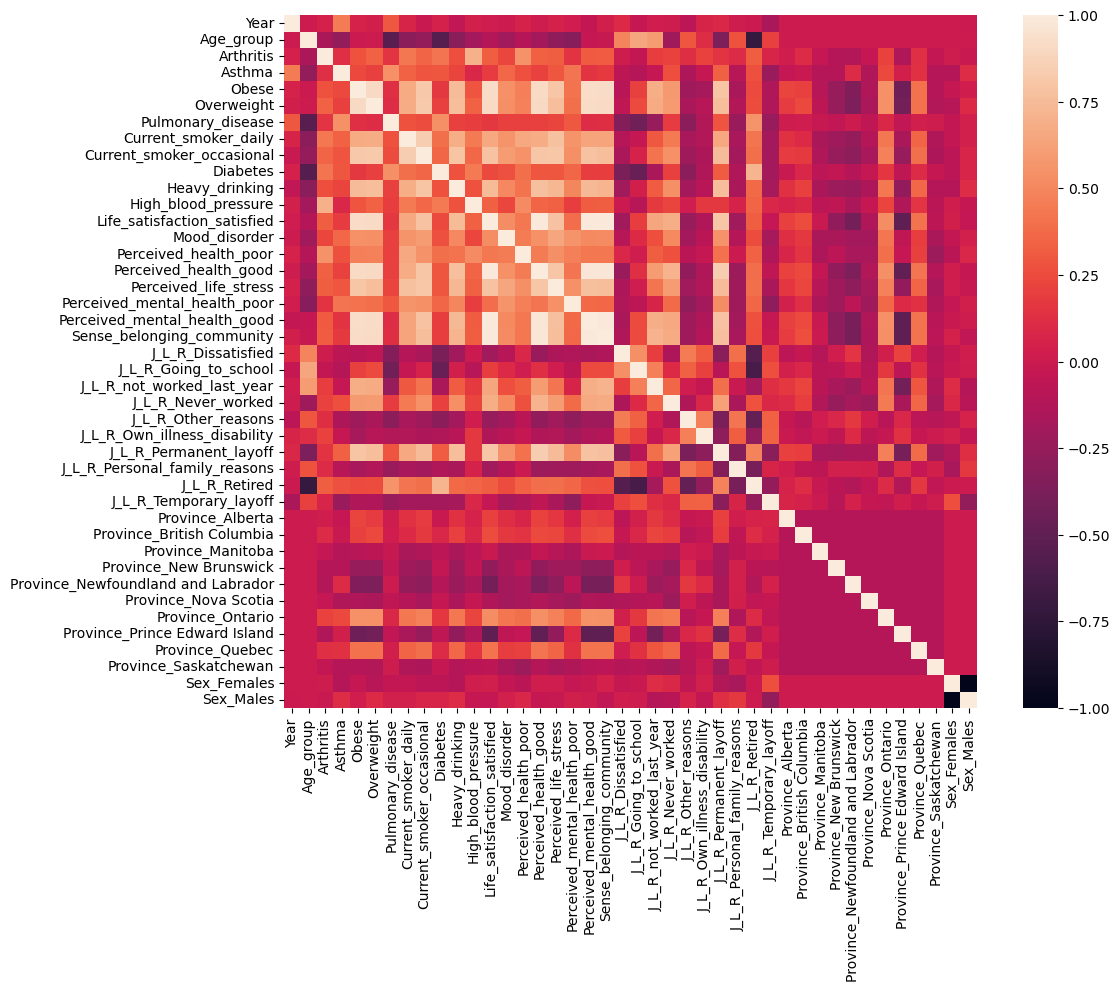

In [10]:
#correlation matrix
corrmat = x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

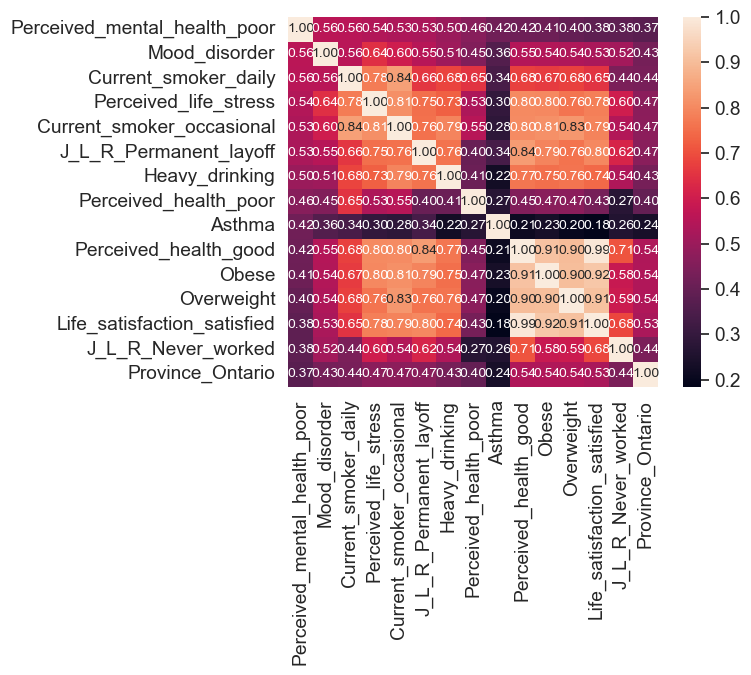

In [11]:
#treatment correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Perceived_mental_health_poor')['Perceived_mental_health_poor'].index
cm = np.corrcoef(x[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
# Assign the data to X and y
X = x[["Year" , "Age_group", "Arthritis" , "Asthma" , "Obese" , "Overweight" ,
               "Pulmonary_disease" , "Current_smoker_daily" , "Current_smoker_occasional" ,
                   "Diabetes" , "Heavy_drinking" , "High_blood_pressure" , "Life_satisfaction_satisfied" ,
                   "Mood_disorder" , "Perceived_health_poor" , "Perceived_health_good" , "Perceived_life_stress" ,
                   "Perceived_mental_health_good" , "Sense_belonging_community" ,
                   "J_L_R_Dissatisfied" , "J_L_R_Going_to_school" , "J_L_R_not_worked_last_year" , "J_L_R_Never_worked" ,
                   "J_L_R_Other_reasons" , "J_L_R_Own_illness_disability" , "J_L_R_Permanent_layoff" ,
                   "J_L_R_Personal_family_reasons" , "J_L_R_Retired" , "J_L_R_Temporary_layoff" ,
                   'Province_Alberta','Province_British Columbia','Province_Manitoba','Province_New Brunswick',
                   'Province_Newfoundland and Labrador','Province_Nova Scotia', 'Province_Ontario',
                   'Province_Prince Edward Island','Province_Quebec','Province_Saskatchewan','Sex_Females', 'Sex_Males'
                    ]]
y = x["Perceived_mental_health_poor"]

print("Shape: ", X.shape, y.shape)

Shape:  (400, 41) (400,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [16]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [17]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.08


In [18]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[70, 30, 228, 64, 155, 62, 251, 209, 251, 251]
Predicted:	[72, 251, 94, 48, 172, 72, 251, 129, 251, 73]
